In [1]:
!rm -rf forestfire_prediction
!git clone https://github.com/akshatha-s13/forestfire_prediction.git
!pip install pandas

Cloning into 'forestfire_prediction'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 246 (delta 9), reused 0 (delta 0), pack-reused 219
Receiving objects: 100% (246/246), 2.01 MiB | 0 bytes/s, done.
Resolving deltas: 100% (101/101), done.
Checking connectivity... done.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:

!pip install 'statsmodels==0.8.0' --force-reinstall
import statsmodels
print (statsmodels.__version__)

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
0.8.0


In [3]:
!pip install "dask[array]>=0.5.0"

    100% |ââââââââââââââââââââââââââââââââ| 655kB 1.9MB/s eta 0:00:01
    100% |ââââââââââââââââââââââââââââââââ| 51kB 7.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for toolz ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/f4/0c/f6/ce6b2d1aa459ee97cc3c0f82236302bd62d89c86c700219463
Successfully built toolz
  Found existing installation: toolz 0.7.2
    Uninstalling toolz-0.7.2:
      Successfully uninstalled toolz-0.7.2
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install --ignore-installed pytz

    100% |ââââââââââââââââââââââââââââââââ| 512kB 2.3MB/s eta 0:00:01
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!pip install --ignore-installed six

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


DATE              object
TempAvg          float64
Humidity         float64
Precipitation    float64
WindSpeed        float64
dtype: object


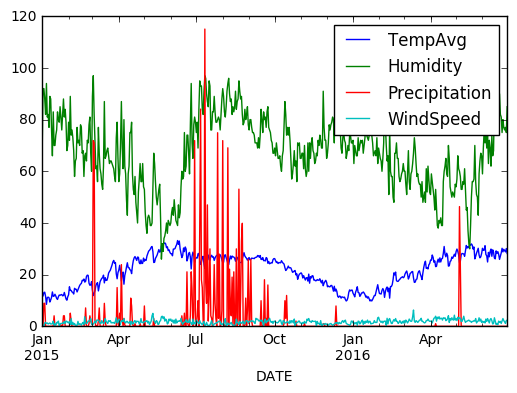

In [7]:
mse1=[]
mse2=[]
df = pd.read_csv("forestfire_prediction/datasets/climate-data/dehradun.csv")
df = df[["DATE","TempAvg","Humidity","Precipitation","WindSpeed"]]
df[["Humidity"]]=df[["Humidity"]].astype(np.float64)
print(df.dtypes)
df['DATE'] = pd.to_datetime(df.DATE , format = '%d-%m-%Y')
data = df.drop(['DATE'], axis=1)
data.index = df.DATE
cols = data.columns
data.plot()
pyplot.show()

**Autocorrelation Plot,Model Summary,Residual Errors Featurewise**

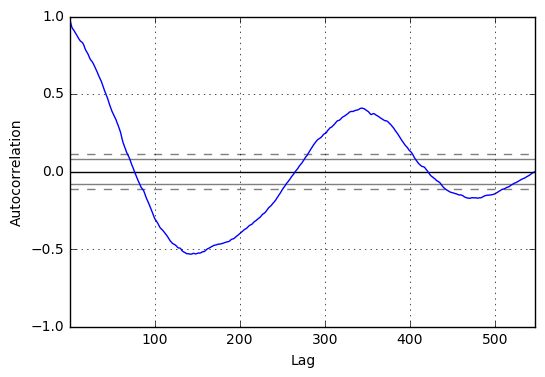

                             ARIMA Model Results                              
Dep. Variable:              D.TempAvg   No. Observations:                  546
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -938.333
Method:                       css-mle   S.D. of innovations              1.349
Date:                Sun, 28 Oct 2018   AIC                           1890.666
Time:                        05:49:37   BIC                           1920.784
Sample:                    01-02-2015   HQIC                          1902.439
                         - 06-30-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0296      0.033      0.885      0.376      -0.036       0.095
ar.L1.D.TempAvg    -0.1516      0.043     -3.534      0.000      -0.236      -0.068
ar.L2.D.TempAvg    -0.1811      

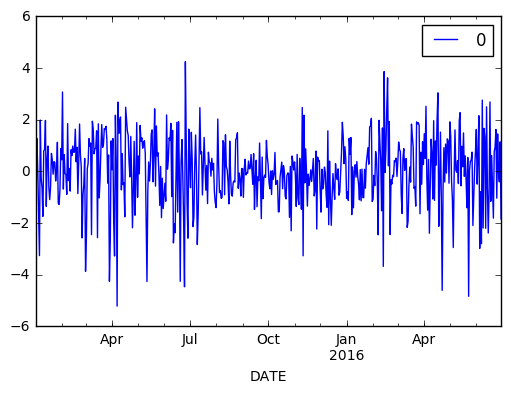

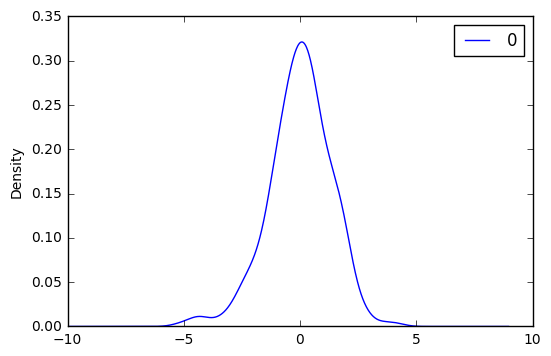

                0
count  546.000000
mean    -0.000820
std      1.350497
min     -5.218554
25%     -0.748078
50%      0.055385
75%      0.865622
max      4.239916


In [8]:
autocorrelation_plot(data[["TempAvg"]])
pyplot.show()
model = ARIMA(data[["TempAvg"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

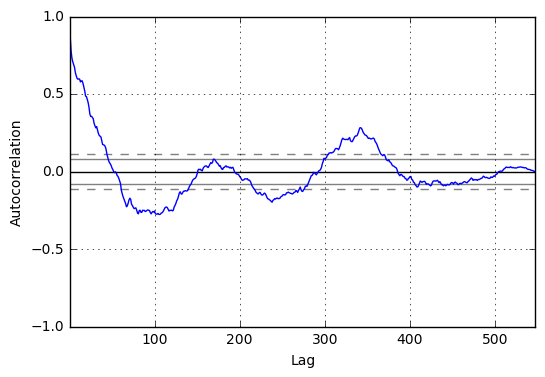

                             ARIMA Model Results                              
Dep. Variable:             D.Humidity   No. Observations:                  546
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1827.292
Method:                       css-mle   S.D. of innovations              6.872
Date:                Sun, 28 Oct 2018   AIC                           3668.584
Time:                        05:49:39   BIC                           3698.703
Sample:                    01-02-2015   HQIC                          3680.358
                         - 06-30-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0032      0.147      0.022      0.983      -0.284       0.290
ar.L1.D.Humidity    -0.2809      0.043     -6.514      0.000      -0.365      -0.196
ar.L2.D.Humidity    -0.2771 

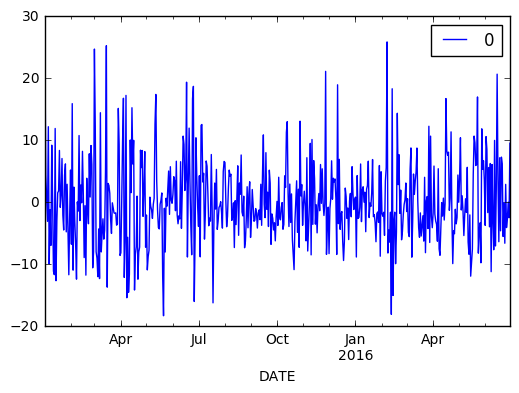

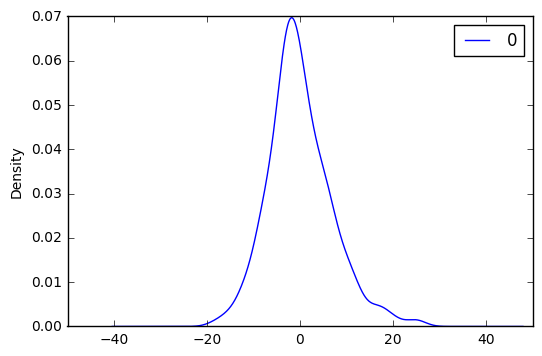

                0
count  546.000000
mean     0.029689
std      6.887721
min    -18.296867
25%     -4.077504
50%     -0.840557
75%      3.872053
max     25.866327


In [9]:

autocorrelation_plot(data[["Humidity"]])
pyplot.show()
model = ARIMA(data[["Humidity"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

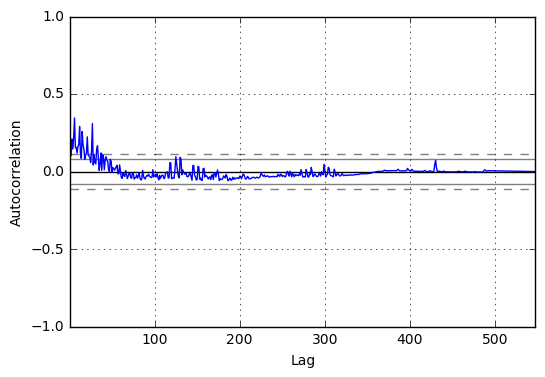

                             ARIMA Model Results                              
Dep. Variable:        D.Precipitation   No. Observations:                  546
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2057.920
Method:                       css-mle   S.D. of innovations             10.473
Date:                Sun, 28 Oct 2018   AIC                           4129.841
Time:                        05:49:41   BIC                           4159.959
Sample:                    01-02-2015   HQIC                          4141.614
                         - 06-30-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0056      0.111     -0.051      0.960      -0.224       0.213
ar.L1.D.Precipitation    -0.8255      0.040    -20.389      0.000      -0.905      -0.746
ar.L2.D.

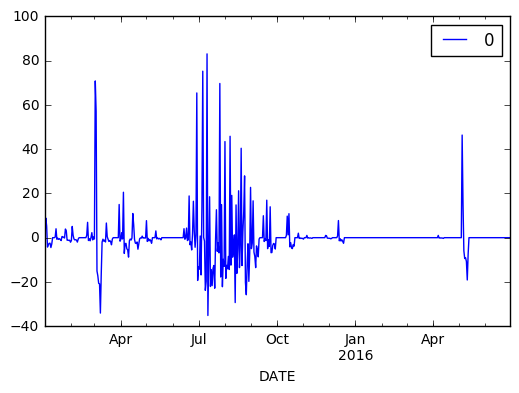

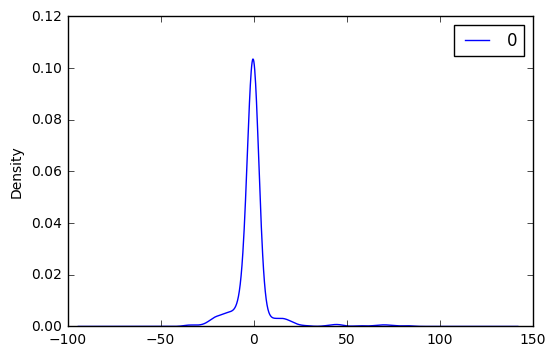

                0
count  546.000000
mean     0.012685
std     10.485305
min    -35.113850
25%     -0.849369
50%      0.022786
75%      0.022786
max     83.026578


In [10]:
autocorrelation_plot(data[["Precipitation"]])
pyplot.show()
model = ARIMA(data[["Precipitation"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

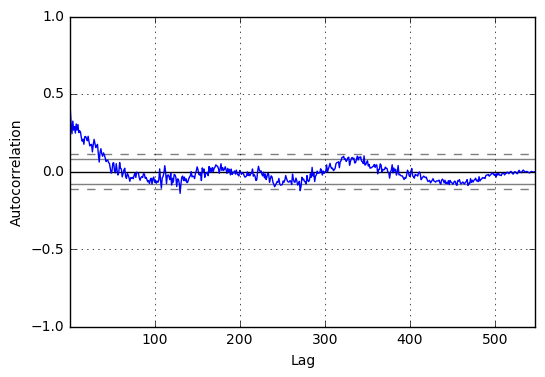

                             ARIMA Model Results                              
Dep. Variable:            D.WindSpeed   No. Observations:                  546
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -607.240
Method:                       css-mle   S.D. of innovations              0.735
Date:                Sun, 28 Oct 2018   AIC                           1228.481
Time:                        05:49:42   BIC                           1258.599
Sample:                    01-02-2015   HQIC                          1240.254
                         - 06-30-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0027      0.010      0.261      0.794      -0.017       0.023
ar.L1.D.WindSpeed    -0.6662      0.042    -15.807      0.000      -0.749      -0.584
ar.L2.D.WindSpeed    -0.

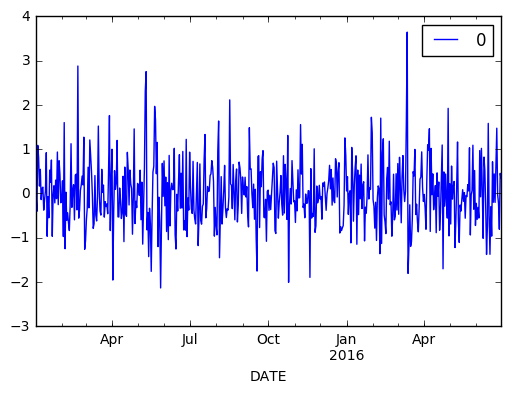

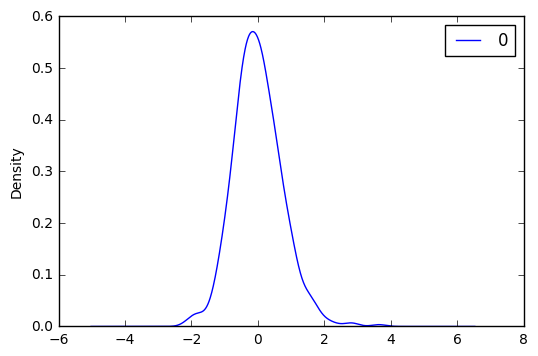

                0
count  546.000000
mean     0.001018
std      0.736201
min     -2.133620
25%     -0.482223
50%     -0.044681
75%      0.441397
max      3.642182


In [11]:
autocorrelation_plot(data[["WindSpeed"]])
pyplot.show()
model = ARIMA(data[["WindSpeed"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

**ARIMA Model Testing for one set of parameters**

predicted=24.170634, expected=25.600000
predicted=25.097259, expected=25.600000
predicted=25.132777, expected=27.600000
predicted=27.014580, expected=26.700000
predicted=26.349257, expected=24.800000
predicted=24.723666, expected=25.300000
predicted=25.569909, expected=23.100000
predicted=23.772627, expected=23.200000
predicted=23.759242, expected=25.100000
predicted=25.394374, expected=26.000000
predicted=25.857262, expected=24.800000
predicted=24.496571, expected=26.500000
predicted=26.108695, expected=24.900000
predicted=24.901754, expected=26.100000
predicted=26.007925, expected=26.300000
predicted=26.304982, expected=28.200000
predicted=27.835966, expected=30.900000
predicted=30.199265, expected=27.900000
predicted=27.385269, expected=26.900000
predicted=26.736885, expected=28.300000
predicted=28.567432, expected=27.400000
predicted=27.825914, expected=23.300000
predicted=23.999714, expected=23.400000
predicted=24.242595, expected=25.100000
predicted=25.805581, expected=25.400000


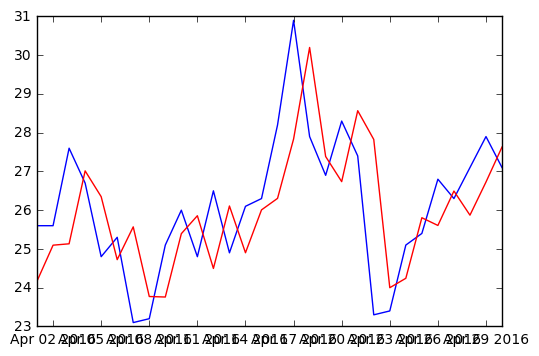

In [12]:
train = data["TempAvg"].loc['01-01-2015':'03-31-2016']
test= data["TempAvg"].loc['04-01-2016':'04-30-2016']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
mse1.append(error)
print('Test MSE: %.3f' % error)
pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions,color='r')
pyplot.show()

predicted=51.825742, expected=51.000000
predicted=53.836996, expected=59.000000
predicted=57.508747, expected=56.000000
predicted=55.953911, expected=53.000000
predicted=53.329874, expected=50.000000
predicted=51.565831, expected=45.000000
predicted=47.509208, expected=53.000000
predicted=53.596669, expected=46.000000
predicted=47.708826, expected=39.000000
predicted=42.033963, expected=38.000000
predicted=41.713073, expected=41.000000
predicted=42.073565, expected=40.000000
predicted=41.290163, expected=42.000000
predicted=41.719799, expected=39.000000
predicted=39.102999, expected=39.000000
predicted=38.960230, expected=56.000000
predicted=51.340465, expected=60.000000
predicted=53.628383, expected=62.000000
predicted=55.954181, expected=65.000000
predicted=60.223897, expected=59.000000
predicted=56.722690, expected=58.000000
predicted=58.474841, expected=70.000000
predicted=67.647360, expected=65.000000
predicted=63.510610, expected=54.000000
predicted=56.394050, expected=52.000000


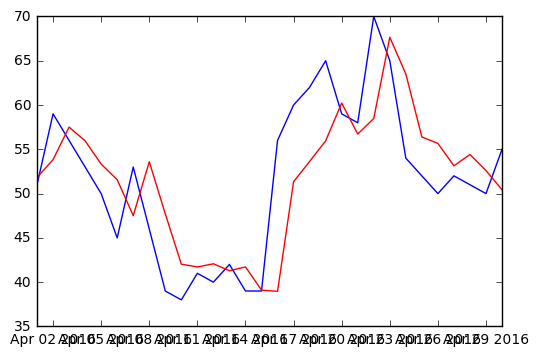

In [13]:
train = data["Humidity"].loc['01-01-2015':'03-31-2016']
test= data["Humidity"].loc['04-01-2016':'04-30-2016']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
mse1.append(error)
print('Test MSE: %.3f' % error)
pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions,color='r')
pyplot.show()

predicted=-0.028197, expected=0.000000
predicted=-0.028134, expected=0.000000
predicted=-0.028071, expected=0.000000
predicted=-0.028011, expected=0.000000
predicted=-0.027948, expected=0.000000
predicted=-0.027888, expected=0.000000
predicted=-0.027828, expected=1.020000
predicted=0.131096, expected=0.000000
predicted=0.014192, expected=0.000000
predicted=0.161401, expected=0.000000
predicted=0.082305, expected=0.000000
predicted=0.164103, expected=0.000000
predicted=0.310388, expected=0.000000
predicted=-0.027410, expected=0.000000
predicted=-0.027351, expected=0.000000
predicted=-0.027293, expected=0.000000
predicted=-0.027237, expected=0.000000
predicted=-0.027177, expected=0.000000
predicted=-0.027119, expected=0.000000
predicted=-0.027063, expected=0.000000
predicted=-0.027005, expected=0.000000
predicted=-0.026948, expected=0.000000
predicted=-0.026891, expected=0.000000
predicted=-0.026835, expected=0.000000
predicted=-0.026778, expected=0.000000
predicted=-0.026723, expected=0

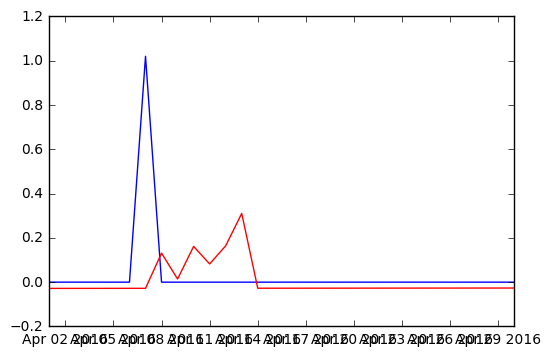

In [14]:
train = data["Precipitation"].loc['01-01-2015':'03-31-2016']
test= data["Precipitation"].loc['04-01-2016':'04-30-2016']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
mse1.append(error)
print('Test MSE: %.3f' % error)
pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions,color='r')
pyplot.show()

predicted=2.007648, expected=2.000000
predicted=2.208402, expected=1.900000
predicted=2.076877, expected=1.300000
predicted=1.897905, expected=2.200000
predicted=2.017765, expected=3.100000
predicted=2.336599, expected=3.300000
predicted=2.513628, expected=3.900000
predicted=2.964804, expected=2.000000
predicted=2.418384, expected=3.500000
predicted=3.025829, expected=3.000000
predicted=3.200271, expected=3.700000
predicted=3.225804, expected=2.800000
predicted=3.274726, expected=3.100000
predicted=2.896095, expected=3.100000
predicted=3.279521, expected=2.400000
predicted=2.815037, expected=3.300000
predicted=3.195081, expected=3.100000
predicted=3.029920, expected=3.300000
predicted=3.077225, expected=2.200000
predicted=2.824766, expected=2.400000
predicted=2.621945, expected=3.000000
predicted=2.988577, expected=4.100000
predicted=3.255504, expected=1.500000
predicted=2.545130, expected=3.000000
predicted=2.701221, expected=2.400000
predicted=2.780648, expected=3.300000
predicted=2.

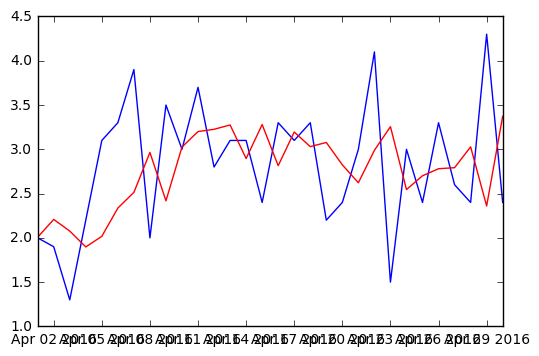

In [15]:
train = data["WindSpeed"].loc['01-01-2015':'03-31-2016']
test= data["WindSpeed"].loc['04-01-2016':'04-30-2016']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
mse1.append(error)
print('Test MSE: %.3f' % error)
pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions,color='r')
pyplot.show()

**Parameter Selection for ARIMA Model** 

In [16]:
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

col="TempAvg"
y=data[col].loc['01-01-2015':'06-30-2016']

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['2015-01-01':'2016-03-31'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3462.8363413291745
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2158.11263726523
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2216.358051054044
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2210.569664837886
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2161.9517350630804
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2160.0153756251984
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3495.6267015819576
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2950.334663173469
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1930.5753879797421
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1865.5716199551207
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1939.6790575110226
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1939.6503343434597
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1872.3289599523753
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1866.5179894700677
ARIMA(0, 1, 0)x(0, 0, 1,

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6174      0.075      8.245      0.000       0.471       0.764
ma.L1         -1.2175      0.083    -14.644      0.000      -1.380      -1.055
ma.S.L12      -0.0059      0.043     -0.137      0.891      -0.091       0.079
sigma2         1.2445      0.174      7.142      0.000       0.903       1.586


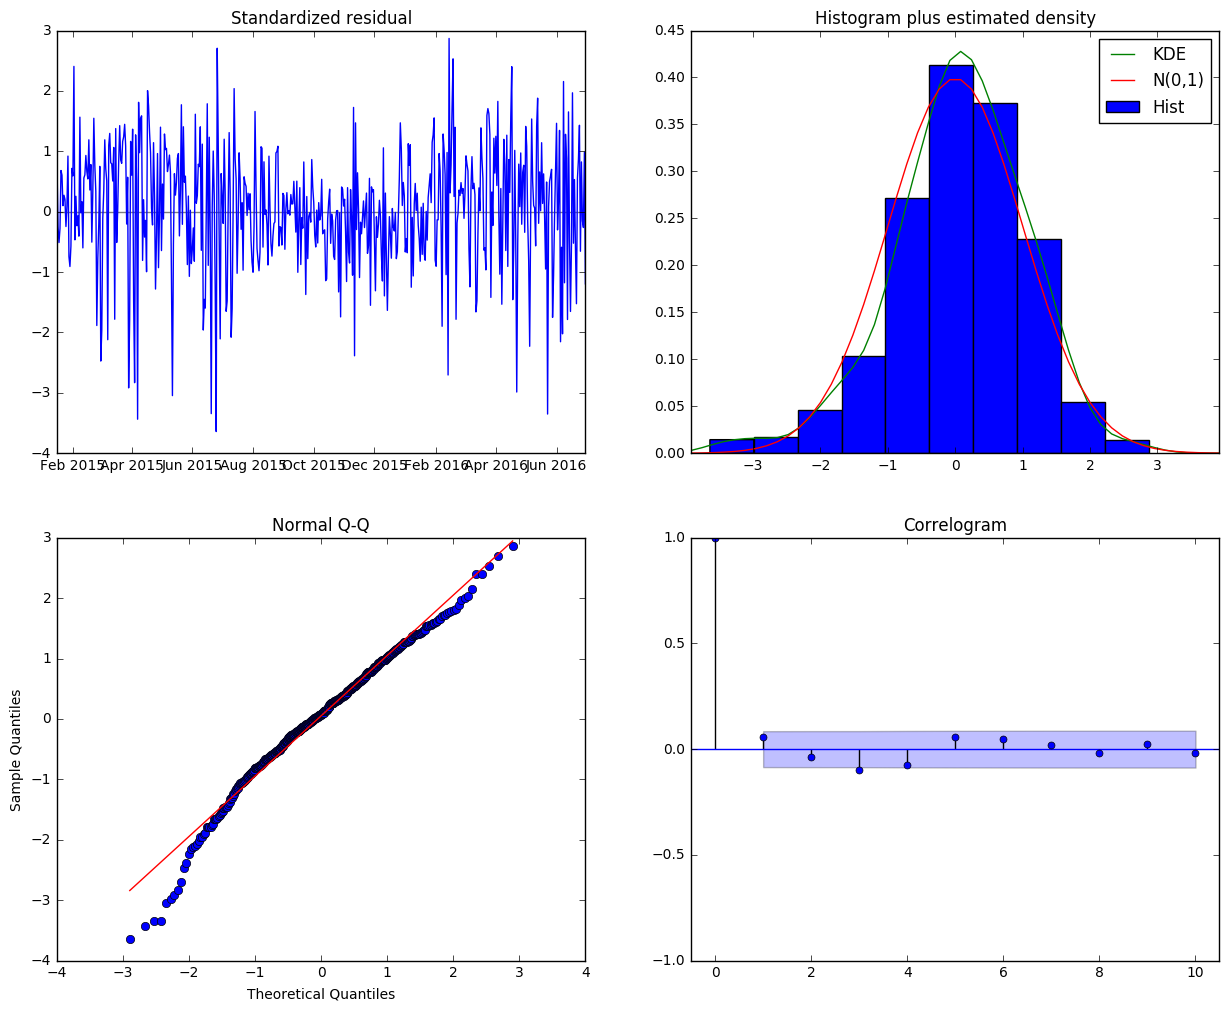

In [17]:
# choose min AIC from above cell output
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

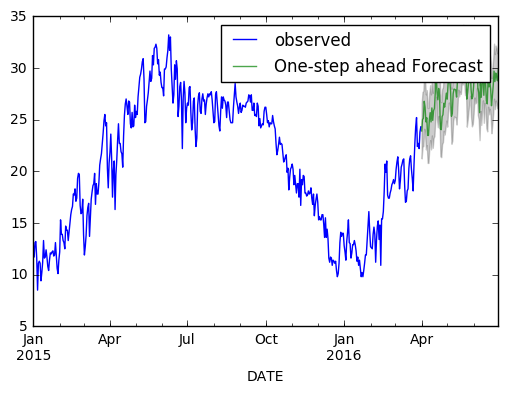

The Mean Squared Error of our forecasts is 2.44


In [18]:
pred = results.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2015-01-01':'2016-03-31'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()

plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2016-04-01':'2016-06-30']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
mse2.append(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [19]:
col="Humidity"
y=data[col].loc['01-01-2015':'06-30-2016']

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['2015-01-01':'2016-03-31'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4530.752552573904
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3344.324082810651
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3454.976979012903
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3429.620845323121
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3356.3109180634247
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3323.3586034780687
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4601.998785814431
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4064.5726627838603
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3274.096096829261
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3136.082636868997
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3278.2684531860814
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3220.001987733987
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3164.6716177783305
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3113.721288056225
ARIMA(0, 1, 0)x(0, 0, 1, 12)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5470      0.051     10.803      0.000       0.448       0.646
ma.L1         -0.8565      0.034    -25.421      0.000      -0.923      -0.790
ma.S.L12       0.0658      0.044      1.494      0.135      -0.021       0.152
sigma2        44.9965      2.140     21.031      0.000      40.803      49.190


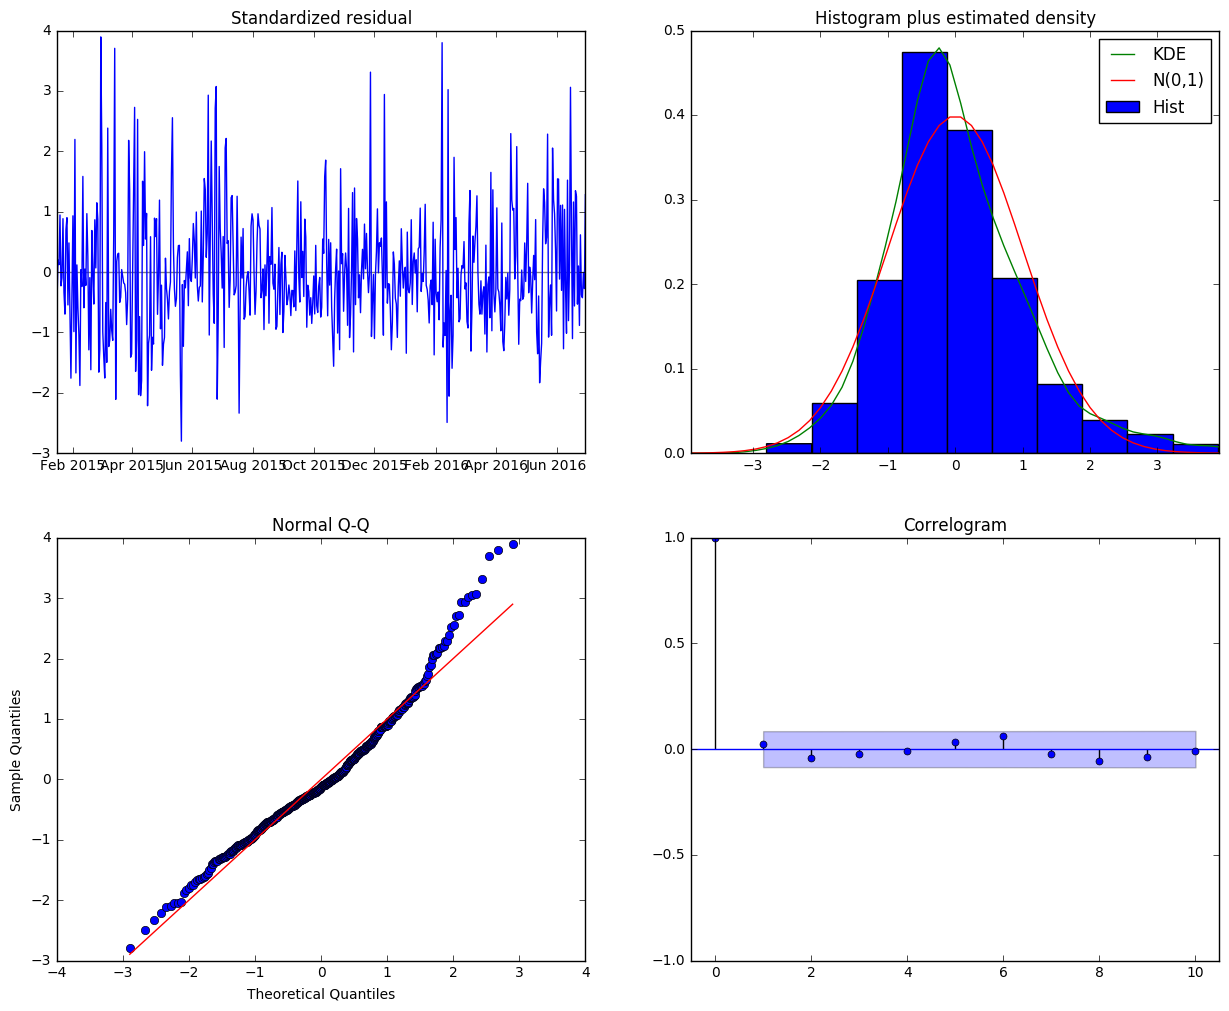

In [20]:
# choose min AIC
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

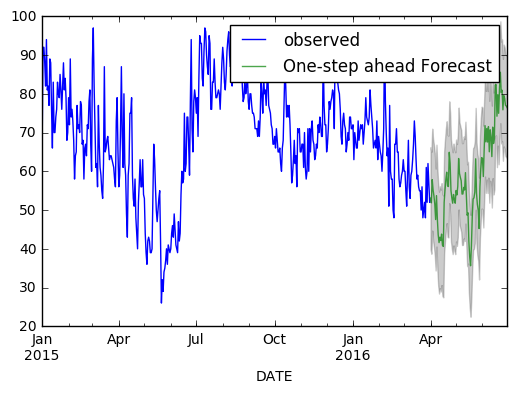

The Mean Squared Error of our forecasts is 44.44


In [21]:
pred = results.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2015-01-01':'2016-03-31'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()

plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2016-04-01':'2016-06-30']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
mse2.append(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [22]:
col="Precipitation"
y=data[col].loc['01-01-2015':'06-30-2016']

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4100.119996422734
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4056.317841569773
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4096.264281537805
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4090.3926319345915
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4154.0423224884125
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4034.333235280492
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4196.603285777566
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4074.5435475620716
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4291.802895617298
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4034.714147146114
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4080.812076497031
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4069.0166840648553
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4147.570227353823
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4014.6206425115824
ARIMA(0, 1, 0)x(0, 0, 1, 12)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0362      0.023      1.589      0.112      -0.008       0.081
ma.L1         -0.9283      0.013    -73.433      0.000      -0.953      -0.903
ma.S.L12       0.1735      0.018      9.598      0.000       0.138       0.209
sigma2       110.3775      2.204     50.076      0.000     106.057     114.698


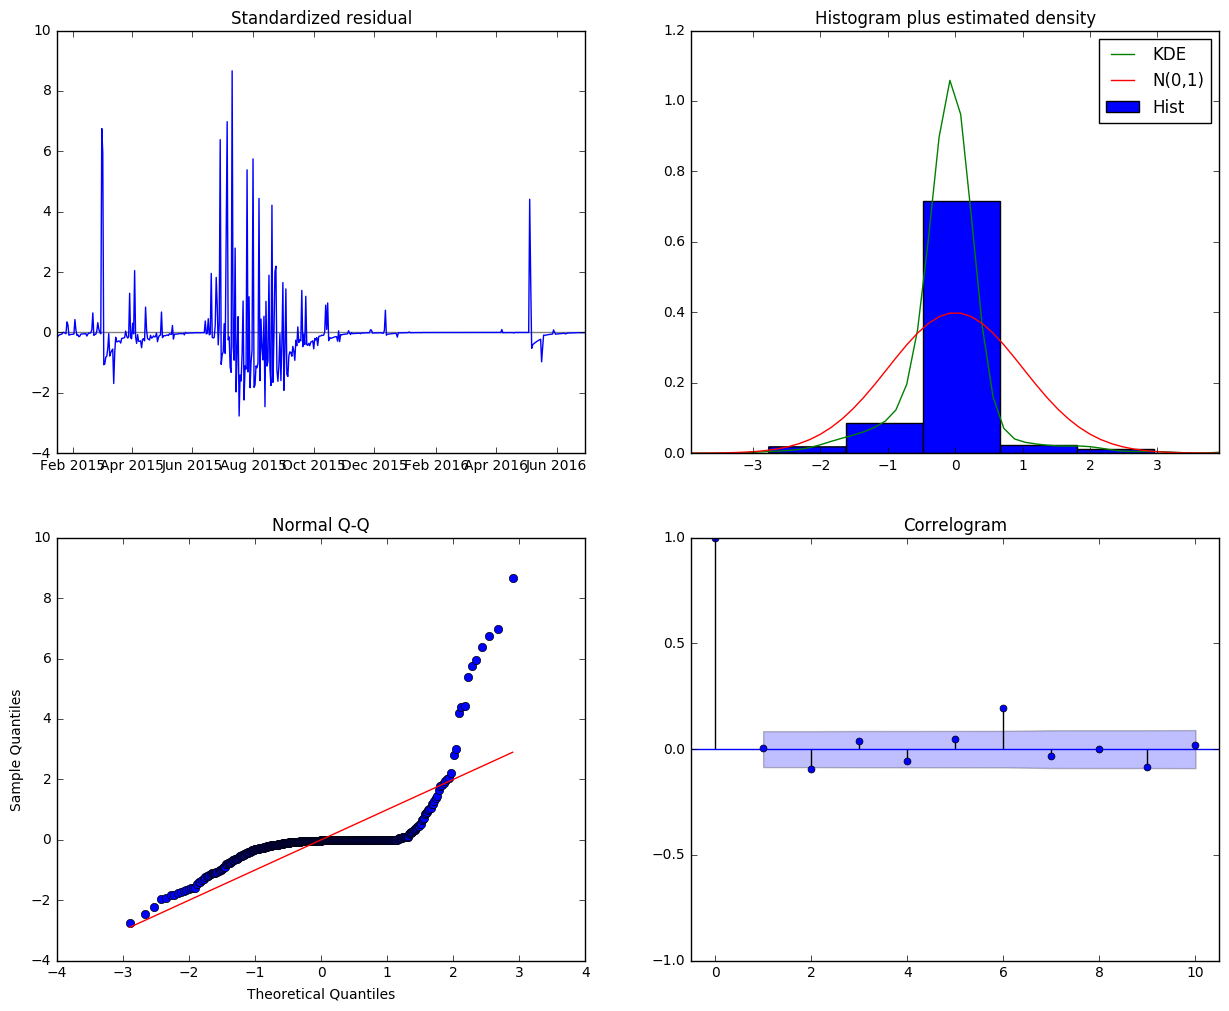

In [23]:
# choose min AIC
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()


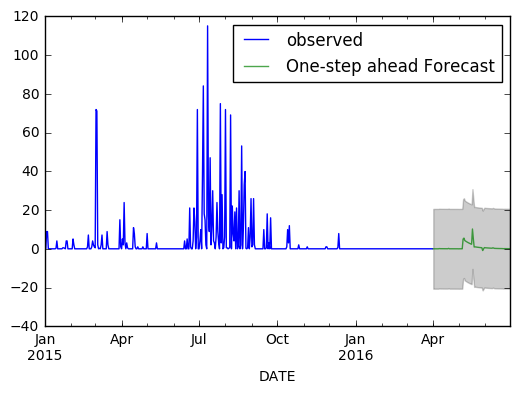

The Mean Squared Error of our forecasts is 30.37


In [24]:
pred = results.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2015-01-01':'2016-03-31'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()

plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2016-04-01':'2016-06-30']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
mse2.append(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [25]:
col="WindSpeed"
y=data[col].loc['01-01-2015':'06-30-2016']

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['01-01-2015':'03-31-2016'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1509.8703608328046
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1062.200466629789
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1224.0284373147406
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1090.6075806820493
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1141.7979706531767
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1050.4644407581764
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1536.6377737671787
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1349.574426285782
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1228.002657898663
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1021.1757555356453
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1194.014221819905
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1049.6899955693248
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.6761562893403
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1017.4819741602241
ARIMA(0, 1, 0)x(0, 0, 1

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1475      0.044      3.340      0.001       0.061       0.234
ma.L1         -0.9056      0.024    -37.797      0.000      -0.953      -0.859
ma.S.L12       0.0243      0.047      0.518      0.605      -0.068       0.116
sigma2         0.5182      0.025     21.049      0.000       0.470       0.566


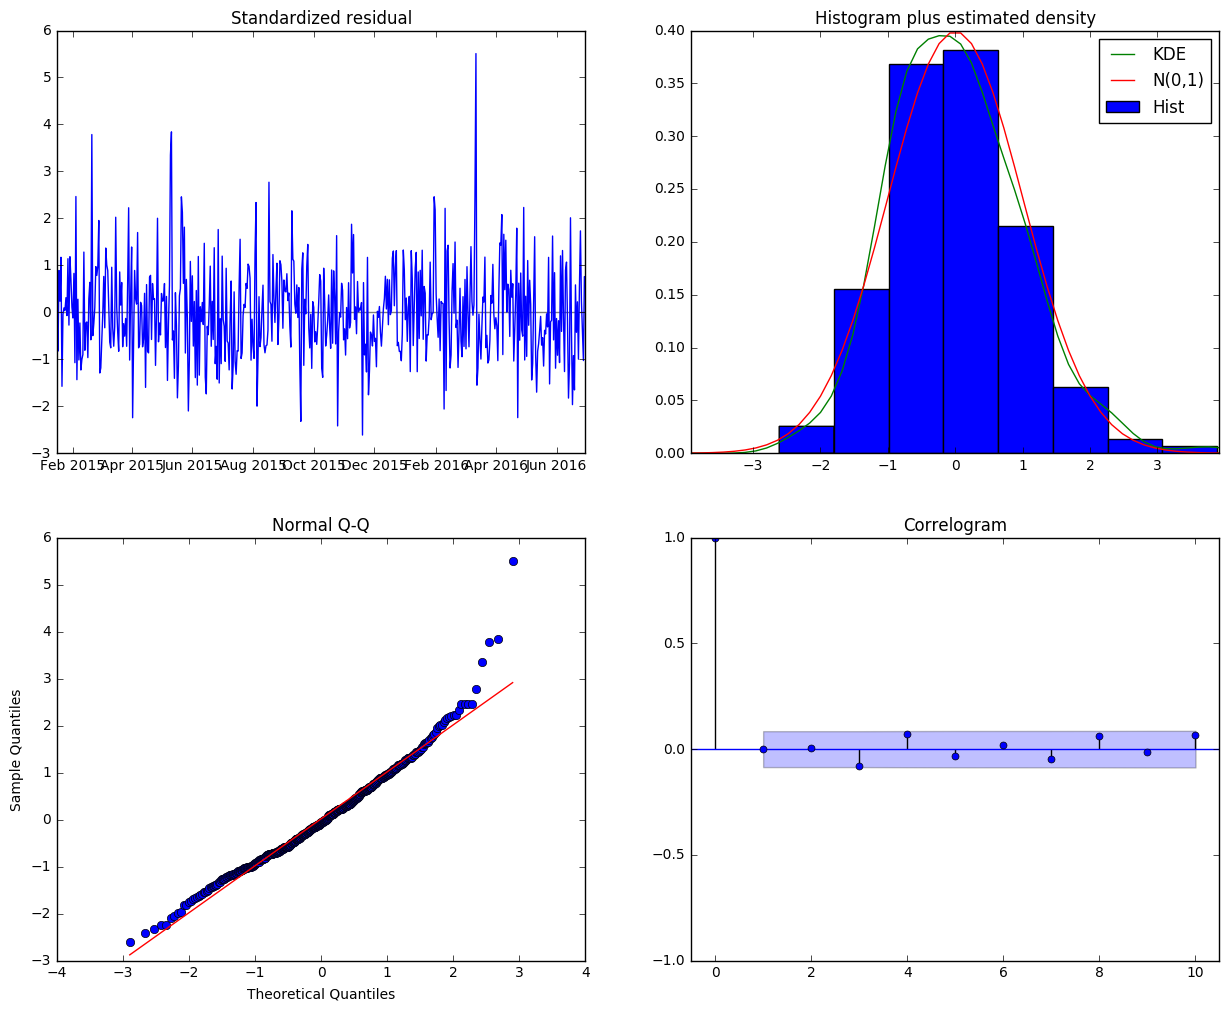

In [26]:
# choose min AIC
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()


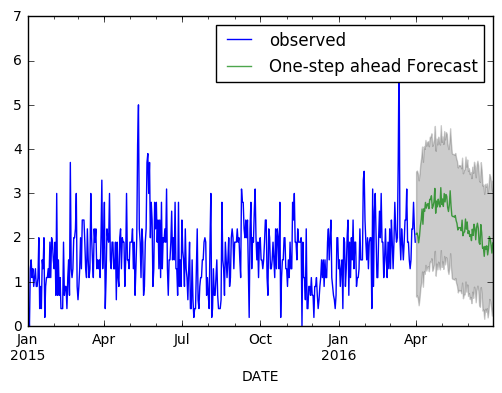

The Mean Squared Error of our forecasts is 0.53


In [27]:
pred = results.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2015-01-01':'2016-03-31'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()

plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2016-04-01':'2016-06-30']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
mse2.append(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [28]:
print ("Before Parameter Tuning")
print(mse1)
print ("After Parameter Tuning")
print(mse2)

Before Parameter Tuning
[2.553310703687329, 37.594503972935804, 0.042949759089839099, 0.65416576188762543]
After Parameter Tuning
[2.4420153719766597, 44.441355456294, 30.373361338919196, 0.5306215130037906]


In [29]:
threshold= [2.5,40.0,10,0.45]  ####rmse values obtained from climate trend of forest fire month

ff_prob=0
for i in range(0,len(threshold)):
       if mse2[i]>0.8*threshold[i] and mse2[i]<1.2*threshold[i]:
              ff_prob+=(4-i)
print("Risk of Forest Fire in next 90 days :")
if ff_prob>6:
   print ("Yes")
else:
        print("No")

Risk of Forest Fire in next 90 days :
Yes
